In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats import zscore

# Load data
checkout_1 = pd.read_csv('checkout_1.csv')
checkout_2 = pd.read_csv('checkout_2.csv')

In [21]:
# Calculate zscores to identify outliers
checkout_1['zscore_today'] = zscore(checkout_1['today'])
checkout_2['zscore_today'] = zscore(checkout_2['today'])

# Identify possible anomalies (considering zscores > 3 or < -3)
anomalies_1 = checkout_1[(checkout_1['zscore_today'] > 3) | (checkout_1['zscore_today'] < -3)]
anomalies_2 = checkout_2[(checkout_2['zscore_today'] > 3) | (checkout_2['zscore_today'] < -3)]

print("Anomalies in checkout_1:")
print(anomalies_1)
print("Anomalies in checkout_2:")
print(anomalies_2)

Anomalies in checkout_1:
Empty DataFrame
Columns: [time, today, yesterday, same_day_last_week, avg_last_week, avg_last_month, zscore_today]
Index: []
Anomalies in checkout_2:
Empty DataFrame
Columns: [time, today, yesterday, same_day_last_week, avg_last_week, avg_last_month, zscore_today]
Index: []


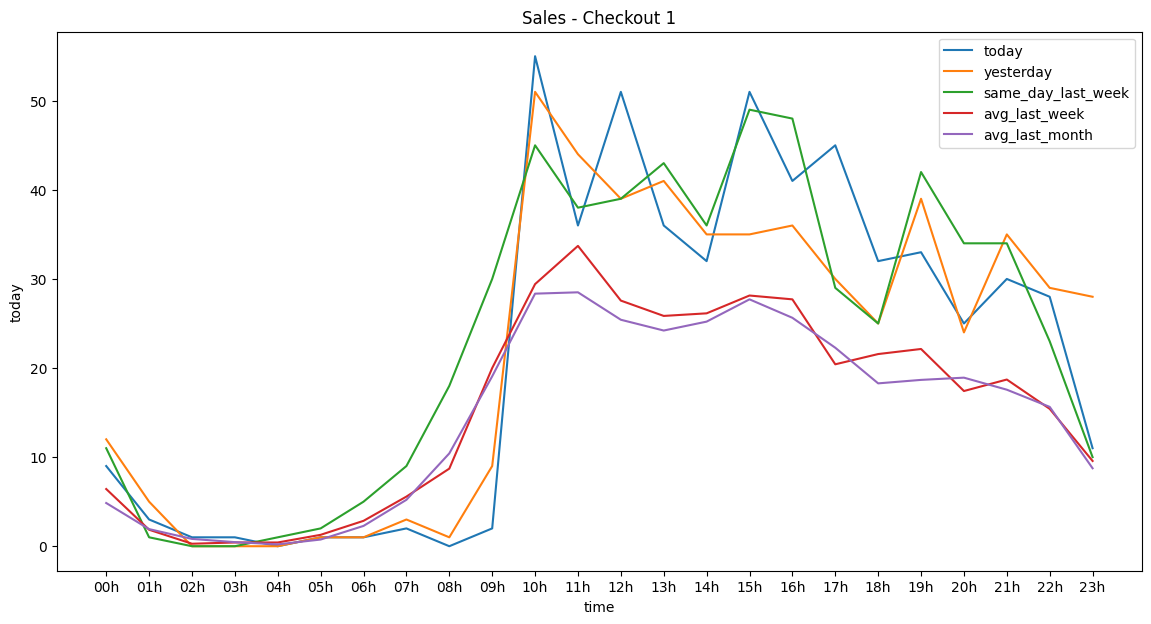

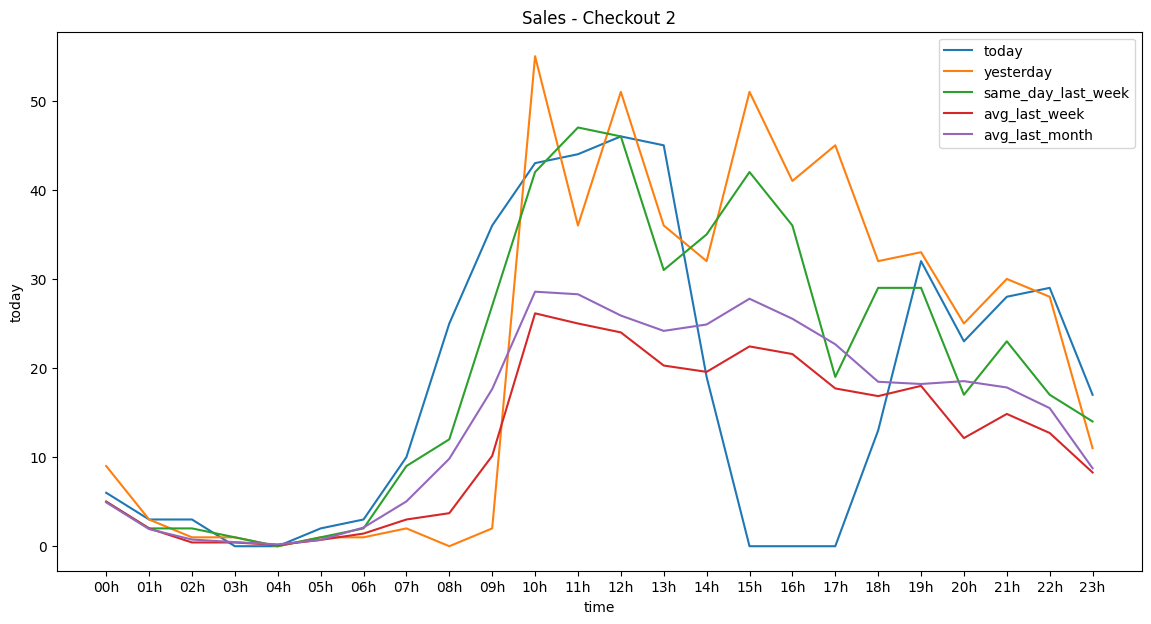

In [22]:
# Graphs
plt.figure(figsize=(14, 7))
sns.lineplot(data=checkout_1, x= 'time', y= 'today', label= 'today')
sns.lineplot(data=checkout_1, x= 'time', y= 'yesterday', label= 'yesterday')
sns.lineplot(data=checkout_1, x= 'time', y= 'same_day_last_week', label= 'same_day_last_week')
sns.lineplot(data=checkout_1, x= 'time', y= 'avg_last_week', label= 'avg_last_week')
sns.lineplot(data=checkout_1, x= 'time', y= 'avg_last_month', label= 'avg_last_month')
plt.legend()
plt.title('Sales - Checkout 1')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=checkout_2, x= 'time', y= 'today', label= 'today')
sns.lineplot(data=checkout_2, x= 'time', y= 'yesterday', label= 'yesterday')
sns.lineplot(data=checkout_2, x= 'time', y= 'same_day_last_week', label= 'same_day_last_week')
sns.lineplot(data=checkout_2, x= 'time', y= 'avg_last_week', label= 'avg_last_week')
sns.lineplot(data=checkout_2, x= 'time', y= 'avg_last_month', label= 'avg_last_month')
plt.legend()
plt.title('Sales - Checkout 2')
plt.show()

In [25]:
# Query
engine = create_engine('sqlite://', echo=False)
checkout_1.to_sql('checkout_1', con=engine, index=False)
checkout_2.to_sql('checkout_2', con=engine, index=False)

query1 = """
SELECT time, today, yesterday, same_day_last_week
FROM checkout_1
WHERE today > (SELECT AVG(today) + 3 * (SELECT SQRT(AVG(today * today) - AVG(today) * AVG(today)) FROM checkout_1) FROM checkout_1)
OR today < (SELECT AVG(today) - 3 * (SELECT SQRT(AVG(today * today) - AVG(today) * AVG(today)) FROM checkout_1) FROM checkout_1)
"""

result1 = pd.read_sql_query(query, con=engine)
print("Query 1 result: ")
print(result1)

query2 = """
SELECT time, today, yesterday, same_day_last_week
FROM checkout_2
WHERE today > (SELECT AVG(today) + 3 * (SELECT SQRT(AVG(today * today) - AVG(today) * AVG(today)) FROM checkout_2) FROM checkout_2)
OR today < (SELECT AVG(today) - 3 * (SELECT SQRT(AVG(today * today) - AVG(today) * AVG(today)) FROM checkout_2) FROM checkout_2)
"""

result2 = pd.read_sql_query(query, con=engine)
print("Query 2 result: ")
print(result2)

Query 1 result: 
Empty DataFrame
Columns: [time, today, yesterday, same_day_last_week]
Index: []
Query 2 result: 
Empty DataFrame
Columns: [time, today, yesterday, same_day_last_week]
Index: []


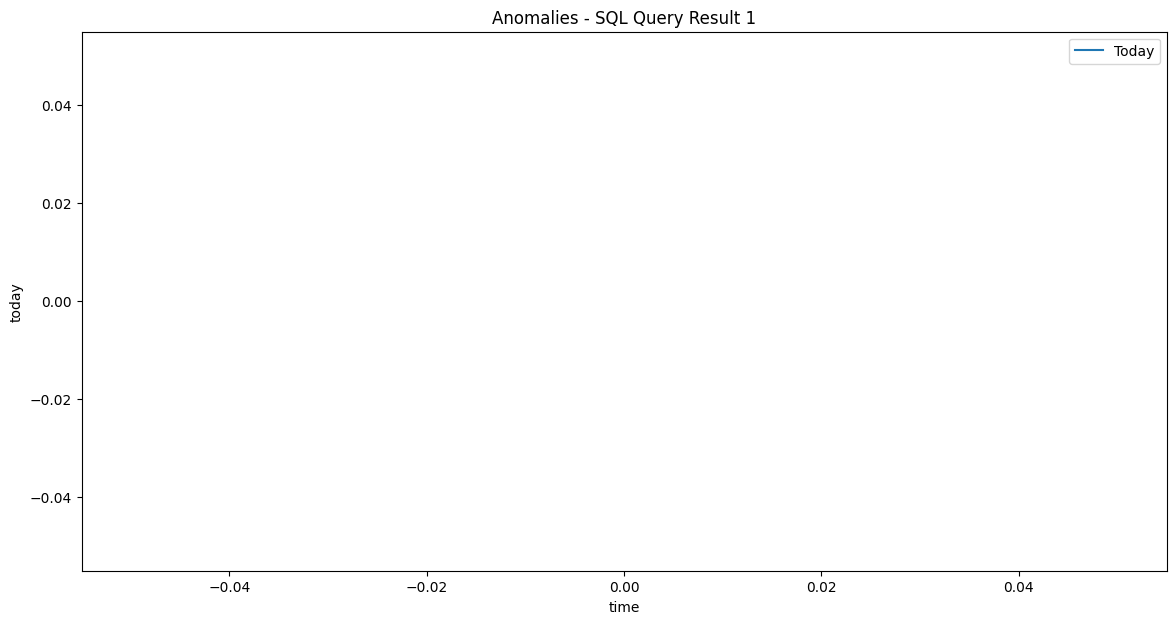

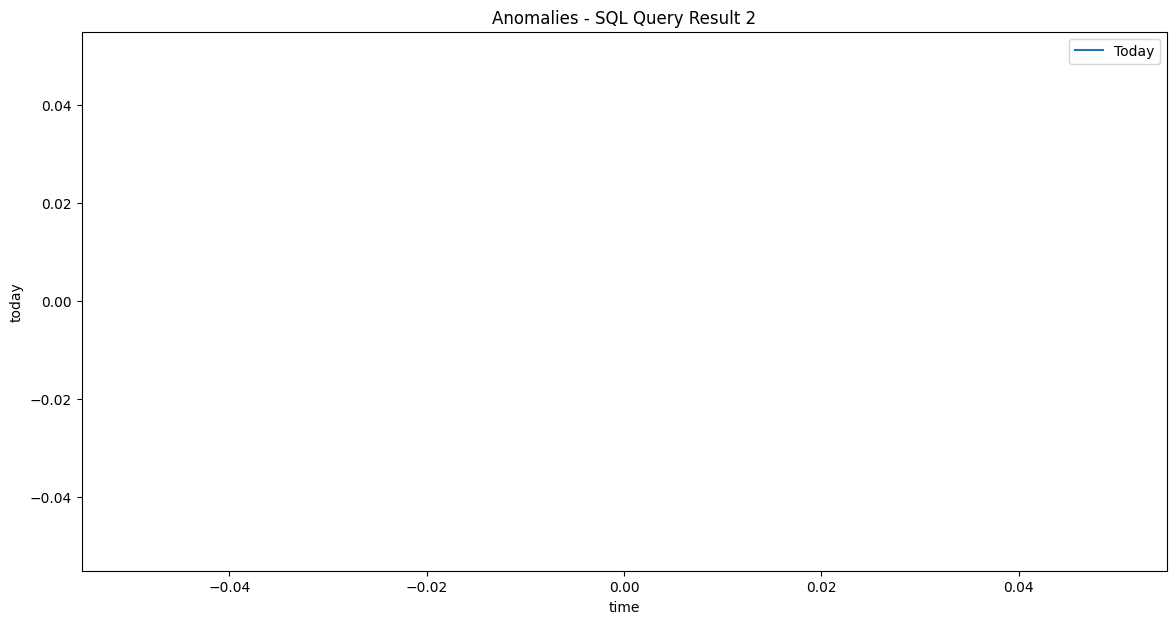

In [23]:
# Graphic result for query 1
plt.figure(figsize=(14, 7))
sns.lineplot(data=result1, x='time', y= 'today', label= 'Today')
plt.legend()
plt.title('Anomalies - SQL Query Result 1')
plt.show()

#  Graphic result for query 2
plt.figure(figsize=(14, 7))
sns.lineplot(data=result2, x='time', y= 'today', label= 'Today')
plt.legend()
plt.title('Anomalies - SQL Query Result 2')
plt.show()